# ดึงข้อมูลรายชั่วโมงที่ต้องการ ของสถานีฝนภายใต้เรดาร์พิษณุโลก

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import requests, os
import pandas as pd
import numpy as np

from math import radians, cos, sin, asin, sqrt

from datetime import datetime
from dateutil.relativedelta import relativedelta
from dateutil import rrule

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline 

## read สถานีวัดฝนที่ตกอยู่ในเรดาร์พิษณุโลก

In [3]:
df_pl = pd.read_csv('../2results/GaugeInBuffer_radar_phitsanulok.csv', encoding="TIS-620")
df_pl.head()

,Unnamed: 0,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry,index_right
0,5,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,POINT (562048.5191703987 1880595.2054925137),0
1,21,BSMP,อบต.บึงสามพัน,15.778058,101.020883,บึงสามพัน,บึงสามพัน,เพชรบูรณ์,แม่น้ำป่าสัก,ภาคเหนือ,R,POINT (716493.0421740364 1745424.0594145989),0
2,23,KRMT,ทต.บ้านโตนด,16.833710,99.802720,โตนด,คีรีมาศ,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,POINT (585521.452742081 1861332.8994148157),0
3,27,LNR1,อบต.ท่ามะนาว,15.199323,101.163878,ท่ามะนาว,ชัยบาดาล,ลพบุรี,แม่น้ำป่าสัก,ภาคกลาง,R,POINT (732464.1843729914 1681523.50019383),0
4,28,SBT1,อบต.ชอนสารเดช,15.184949,100.681312,ชอนสารเดช,หนองม่วง,ลพบุรี,แม่น้ำเจ้าพระยา,ภาคกลาง,R,POINT (680619.8148486458 1679476.6163647512),0


In [4]:
station_pl = df_pl['code']
station_pl

0      BDLH  
1      BSMP  
2      KRMT  
3      LNR1  
4      SBT1  
        ...  
265    TBR015
266    TBR013
267    CHK001
268    KWN003
269    CHK002
Name: code, Length: 270, dtype: object

## ดึงข้อมูลฝนจากสสน.

In [5]:
#คำสั่งนี้ใช้เรียกปริมาณน้ำฝนแบบรายวันจาก URL ของสถาบันสารสนเทศทรัพยากรน้ำ (องค์การมหาชน)
def get_rainfall_hii(df_filter, start, end):
  url_source = 'https://tiservice.hii.or.th/opendata/data_catalog/hourly_rain/'
  path_output = '../2results/0rain_haii_hour_test/0rain_hourly/' #สร้างโฟลเดอร์ก่อน

  #date_start = datetime.strptime(start + '-01', '%Y-%m-%d')
  #date_end = datetime.strptime(end + '-01', '%Y-%m-%d')

  date_start = datetime.strptime(start, '%Y-%m-%d')
  date_end = datetime.strptime(end, '%Y-%m-%d')

  condition = rrule.rrule(rrule.MONTHLY, dtstart=date_start, until=date_end)
  total_process = condition.count()
  i = 1

  for date in condition:
    print('========== Start process (' + str(i) + '/' + str(total_process) + '): ' + date.strftime('%Y-%m') + ' ==========')
    year = date.strftime('%Y')
    month = date.strftime('%m')

    path = path_output + year + '/' + month
    Path(path).mkdir(parents=True, exist_ok=True)

    for code in df_filter['code']:
      # print(code)

      url = url_source + year + '/' + year + month + '/' + code.strip() + '.csv'

      # Download and save file
      result = requests.get(url)
      if result.status_code == 200:
        file_path = Path(path + '/' + code.strip() + '.csv')
        file_path.write_bytes(result.content)
        # print('Downloaded: ' + year + '/' + month + '/' + code.strip())
      else:
        print('Failed: '  + year + '/' + month + '/' + code.strip())
    i += 1

In [6]:
# เรียก Station ของสสน.จาก URL 
df_hii = pd.read_csv('https://tiservice.hii.or.th/opendata/data_catalog/daily_rain/station_metadata.csv')
df_hii.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R


In [7]:
#เรียกข้อมูลสถานีที่อยู่ภายใต้เรดาร์พิษณุโลกจากสถานีทั้งหมดของสสน.
# Strip whitespace in Column Code
df_hii['code'] = df_hii['code'].str.strip()
# Filter the DataFrame based on the list of stations
df_filter = df_hii[df_hii['code'].isin(station_pl.str.strip())]
df_filter

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
5,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
21,BSMP,อบต.บึงสามพัน,15.778058,101.020883,บึงสามพัน,บึงสามพัน,เพชรบูรณ์,แม่น้ำป่าสัก,ภาคเหนือ,R
23,KRMT,ทต.บ้านโตนด,16.833710,99.802720,โตนด,คีรีมาศ,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
27,LNR1,อบต.ท่ามะนาว,15.199323,101.163878,ท่ามะนาว,ชัยบาดาล,ลพบุรี,แม่น้ำป่าสัก,ภาคกลาง,R
28,SBT1,อบต.ชอนสารเดช,15.184949,100.681312,ชอนสารเดช,หนองม่วง,ลพบุรี,แม่น้ำเจ้าพระยา,ภาคกลาง,R
...,...,...,...,...,...,...,...,...,...,...
894,TBR015,สวนเพชรล้านนา,18.803125,99.583744,แม่สุก,แจ้ห่ม,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
908,TBR013,อบต.ท่าเสา,15.990042,100.221594,ท่าเสา,โพทะเล,พิจิตร,แม่น้ำน่าน,ภาคเหนือ,R
944,CHK001,บ่อดินขาว,15.168998,100.414714,ช่องแค,ตาคลี,นครสวรรค์,NaN,ภาคเหนือ,W
945,KWN003,เขื่อนแควน้อยบำรุงแดน,17.182176,100.413907,คันโช้ง,วัดโบสถ์,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,W


In [8]:
# กำหนดปีเดือนเริ่มต้นและวันที่สิ้นสุด
start = '2018-07-21'
end = '2018-07-21'

# เรียกฟังก์ชั่นดึงข้อมูลจาก hii
get_rainfall_hii(df_filter, start, end)

========== Start process (1/1): 2018-07 ==========
Failed: 2018/07/ATG132
Failed: 2018/07/ATG181
Failed: 2018/07/ATG182
Failed: 2018/07/ATG121
Failed: 2018/07/ATG042
Failed: 2018/07/ATG131
Failed: 2018/07/ATG162
Failed: 2018/07/ATG161
Failed: 2018/07/ATG151
Failed: 2018/07/ATG122
Failed: 2018/07/ATG021
Failed: 2018/07/ATG112
Failed: 2018/07/ATG152
Failed: 2018/07/ATG011
Failed: 2018/07/ATG111
Failed: 2018/07/ATG032
Failed: 2018/07/ATG031
Failed: 2018/07/FOP016
Failed: 2018/07/FOP056
Failed: 2018/07/FOP020
Failed: 2018/07/FOP021
Failed: 2018/07/FOP055
Failed: 2018/07/FOP019
Failed: 2018/07/FOP022
Failed: 2018/07/VLGE49
Failed: 2018/07/VLGE45
Failed: 2018/07/CHK001
Failed: 2018/07/KWN003
Failed: 2018/07/CHK002


In [9]:
path_output = '../2results/0rain_haii_hour_test/0rain_hourly/'
#date_start = datetime.strptime(start + '-01', '%Y-%m-%d')
#date_end = datetime.strptime(end + '-01', '%Y-%m-%d')
date_start = datetime.strptime(start, '%Y-%m-%d')
date_end = datetime.strptime(end, '%Y-%m-%d')


condition = rrule.rrule(rrule.MONTHLY, dtstart=date_start, until=date_end)

temp = []

for date in condition:
  year = date.strftime('%Y')
  month = date.strftime('%m')

  target = path_output + year + '/' + month + '/'

  for filename in os.listdir(target):
    station = filename.split('.')[0]
    df = pd.read_csv(target + filename)
    df['station'] = station
    temp.append(df)

In [10]:
temp[:1]

[           date   time  rain station
 0    2018-07-01  00:00   0.0    BARI
 1    2018-07-01  01:00   0.0    BARI
 2    2018-07-01  02:00   0.0    BARI
 3    2018-07-01  03:00   0.0    BARI
 4    2018-07-01  04:00   0.0    BARI
 ..          ...    ...   ...     ...
 739  2018-07-31  19:00   0.0    BARI
 740  2018-07-31  20:00   0.0    BARI
 741  2018-07-31  21:00   0.0    BARI
 742  2018-07-31  22:00   0.0    BARI
 743  2018-07-31  23:00   0.0    BARI
 
 [744 rows x 4 columns]]

## ดึงฝนเฉพาะวันและชั่วโมงที่ต้องการมาใช้งาน

In [11]:
temp_pd=pd.concat(temp).reset_index(drop=False)
# get columns using dataframe subsetting
rain_subset = temp_pd[['date','time', 'rain', 'station']]
rain_subset['full_date']=rain_subset['date'].map(str)+'-'+rain_subset['time'].map(str)

rain_subset

,date,time,rain,station,full_date
0,2018-07-01,00:00,0.0,BARI,2018-07-01-00:00
1,2018-07-01,01:00,0.0,BARI,2018-07-01-01:00
2,2018-07-01,02:00,0.0,BARI,2018-07-01-02:00
3,2018-07-01,03:00,0.0,BARI,2018-07-01-03:00
4,2018-07-01,04:00,0.0,BARI,2018-07-01-04:00
...,...,...,...,...,...
179299,2018-07-31,19:00,0.0,YOM012,2018-07-31-19:00
179300,2018-07-31,20:00,0.0,YOM012,2018-07-31-20:00
179301,2018-07-31,21:00,0.0,YOM012,2018-07-31-21:00
179302,2018-07-31,22:00,0.0,YOM012,2018-07-31-22:00


In [12]:
# ดึงเอาเฉพาะวัน-ชั่วโมงที่ต้องการมาใช้งาน
rain_ =rain_subset[rain_subset['full_date']=='2018-07-21-19:00']
rain_

,date,time,rain,station,full_date
499,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00
1243,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00
1987,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00
2731,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00
3475,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00
...,...,...,...,...,...
176083,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00
176827,2018-07-21,19:00,-999.0,YOM009,2018-07-21-19:00
177571,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00
178315,2018-07-21,19:00,-999.0,YOM011,2018-07-21-19:00


# จัดข้อมูลให้มีค่าพิกัดสถานีเพื่อนำไปวิเคราะห์เชิงพื้นที่

In [13]:
df1=rain_
df2=df_filter
df_rain_pl=rain_.merge(df_filter,left_on='station', right_on='code')
df_rain_pl.head()

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00,BJIG,อบต.บ้านเจียง,16.018830,101.500090,บ้านเจียง,ภักดีชุมพล,ชัยภูมิ,แม่น้ำชี,ภาคตะวันออกเฉียงเหนือ,R


In [14]:
df_rain_pl

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00,BJIG,อบต.บ้านเจียง,16.018830,101.500090,บ้านเจียง,ภักดีชุมพล,ชัยภูมิ,แม่น้ำชี,ภาคตะวันออกเฉียงเหนือ,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00,YOM008,บางระกำ,16.708176,100.171827,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,W
237,2018-07-21,19:00,-999.0,YOM009,2018-07-21-19:00,YOM009,โพธิ์ประทับช้าง,16.310789,100.271763,โพธิ์ประทับช้าง,โพธิ์ประทับช้าง,พิจิตร,แม่น้ำยม,ภาคเหนือ,W
238,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00,YOM010,เมืองแพร่,18.133726,100.124570,ป่าแมต,เมืองแพร่,แพร่,แม่น้ำยม,ภาคเหนือ,W
239,2018-07-21,19:00,-999.0,YOM011,2018-07-21-19:00,YOM011,งาว,18.760802,99.972666,หลวงใต้,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,W


## ตรวจสอบข้อมูลฝน nan

In [15]:
df_rain_pl['rain'].unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4     -999.0
       ...  
236      0.0
237   -999.0
238      0.0
239   -999.0
240      0.0
Name: rain, Length: 241, dtype: float64>

In [16]:
df2=df_rain_pl.dropna(subset=['rain'])
df2

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00,BJIG,อบต.บ้านเจียง,16.018830,101.500090,บ้านเจียง,ภักดีชุมพล,ชัยภูมิ,แม่น้ำชี,ภาคตะวันออกเฉียงเหนือ,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00,YOM008,บางระกำ,16.708176,100.171827,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,W
237,2018-07-21,19:00,-999.0,YOM009,2018-07-21-19:00,YOM009,โพธิ์ประทับช้าง,16.310789,100.271763,โพธิ์ประทับช้าง,โพธิ์ประทับช้าง,พิจิตร,แม่น้ำยม,ภาคเหนือ,W
238,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00,YOM010,เมืองแพร่,18.133726,100.124570,ป่าแมต,เมืองแพร่,แพร่,แม่น้ำยม,ภาคเหนือ,W
239,2018-07-21,19:00,-999.0,YOM011,2018-07-21-19:00,YOM011,งาว,18.760802,99.972666,หลวงใต้,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,W


In [17]:
df2 = df2.dropna().reset_index(drop=True)
df2

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00,BJIG,อบต.บ้านเจียง,16.018830,101.500090,บ้านเจียง,ภักดีชุมพล,ชัยภูมิ,แม่น้ำชี,ภาคตะวันออกเฉียงเหนือ,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00,YOM008,บางระกำ,16.708176,100.171827,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,W
237,2018-07-21,19:00,-999.0,YOM009,2018-07-21-19:00,YOM009,โพธิ์ประทับช้าง,16.310789,100.271763,โพธิ์ประทับช้าง,โพธิ์ประทับช้าง,พิจิตร,แม่น้ำยม,ภาคเหนือ,W
238,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00,YOM010,เมืองแพร่,18.133726,100.124570,ป่าแมต,เมืองแพร่,แพร่,แม่น้ำยม,ภาคเหนือ,W
239,2018-07-21,19:00,-999.0,YOM011,2018-07-21-19:00,YOM011,งาว,18.760802,99.972666,หลวงใต้,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,W


In [18]:
df_rain_pl.applymap(np.isreal)['rain']

0      True
1      True
2      True
3      True
4      True
       ... 
236    True
237    True
238    True
239    True
240    True
Name: rain, Length: 241, dtype: bool

In [19]:
df = df_rain_pl.drop(df_rain_pl[df_rain_pl['rain'] == '-'].index)
df = df.dropna().reset_index(drop=True)
df

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,-999.0,BJIG,2018-07-21-19:00,BJIG,อบต.บ้านเจียง,16.018830,101.500090,บ้านเจียง,ภักดีชุมพล,ชัยภูมิ,แม่น้ำชี,ภาคตะวันออกเฉียงเหนือ,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00,YOM008,บางระกำ,16.708176,100.171827,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,W
237,2018-07-21,19:00,-999.0,YOM009,2018-07-21-19:00,YOM009,โพธิ์ประทับช้าง,16.310789,100.271763,โพธิ์ประทับช้าง,โพธิ์ประทับช้าง,พิจิตร,แม่น้ำยม,ภาคเหนือ,W
238,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00,YOM010,เมืองแพร่,18.133726,100.124570,ป่าแมต,เมืองแพร่,แพร่,แม่น้ำยม,ภาคเหนือ,W
239,2018-07-21,19:00,-999.0,YOM011,2018-07-21-19:00,YOM011,งาว,18.760802,99.972666,หลวงใต้,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,W


In [20]:
df = df.drop(df[df['rain'] == -999.0].index)
df = df.dropna().reset_index(drop=True)
#df = df.dropna().reset_index(drop=True)
df

,date,time,rain,station,full_date,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,2018-07-21,19:00,0.0,BARI,2018-07-21-19:00,BARI,ศูนย์อปพร. อบต.บ้านไร่,15.082658,99.519360,บ้านไร่,บ้านไร่,อุทัยธานี,แม่น้ำท่าจีน,ภาคเหนือ,R
1,2018-07-21,19:00,0.0,BBON,2018-07-21-19:00,BBON,อบต.แจ้ซ้อน,18.816925,99.500032,แจ้ซ้อน,เมืองปาน,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R
2,2018-07-21,19:00,0.0,BDLH,2018-07-21-19:00,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R
3,2018-07-21,19:00,0.0,BHMN,2018-07-21-19:00,BHMN,อบต.ห้วยมุ่น,17.809158,100.939462,ห้วยมุ่น,น้ำปาด,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R
4,2018-07-21,19:00,0.0,BKDN,2018-07-21-19:00,BKDN,อบต.เขาทอง,15.570718,100.183206,เขาทอง,พยุหะคีรี,นครสวรรค์,แม่น้ำเจ้าพระยา,ภาคเหนือ,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2018-07-21,19:00,0.0,YOM003,2018-07-21-19:00,YOM003,หนองม่วงไข่,18.265901,100.177062,น้ำรัด,หนองม่วงไข่,แพร่,แม่น้ำยม,ภาคเหนือ,W
177,2018-07-21,19:00,0.0,YOM006,2018-07-21-19:00,YOM006,สวรรคโลก,17.201904,99.863866,ท่าทอง,สวรรคโลก,สุโขทัย,แม่น้ำยม,ภาคเหนือ,W
178,2018-07-21,19:00,0.0,YOM008,2018-07-21-19:00,YOM008,บางระกำ,16.708176,100.171827,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,W
179,2018-07-21,19:00,0.0,YOM010,2018-07-21-19:00,YOM010,เมืองแพร่,18.133726,100.124570,ป่าแมต,เมืองแพร่,แพร่,แม่น้ำยม,ภาคเหนือ,W


In [21]:
df['rain'].unique()

array([ 0. ,  0.2,  0.6,  2.2,  6. ,  0.8,  0.4,  3.6, 10.2])

## visulaization & Exploratory Data Analysis (EDA)
https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/

In [22]:
df['rain'].describe( )

count    181.000000
mean       0.163536
std        0.943161
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.200000
Name: rain, dtype: float64

<AxesSubplot: title={'center': 'rain'}, xlabel='basin'>

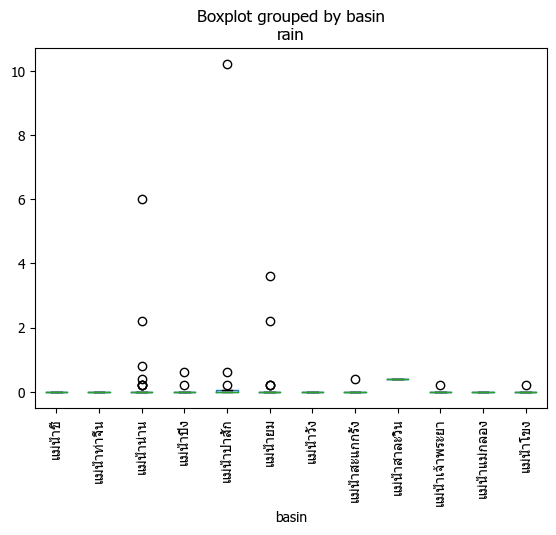

In [23]:
plt.rcParams['font.family']='Tahoma'
df.boxplot(by='basin',column=['rain'], rot=90, grid = False)

## boxplot ใช้ seaborn

[Text(0, 0, 'แม่น้ำท่าจีน'),
 Text(1, 0, 'แม่น้ำวัง'),
 Text(2, 0, 'แม่น้ำยม'),
 Text(3, 0, 'แม่น้ำน่าน'),
 Text(4, 0, 'แม่น้ำเจ้าพระยา'),
 Text(5, 0, 'แม่น้ำชี'),
 Text(6, 0, 'แม่น้ำปิง'),
 Text(7, 0, 'แม่น้ำโขง'),
 Text(8, 0, 'แม่น้ำป่าสัก'),
 Text(9, 0, 'แม่น้ำสะแกกรัง'),
 Text(10, 0, 'แม่น้ำสาละวิน'),
 Text(11, 0, 'แม่น้ำแม่กลอง')]

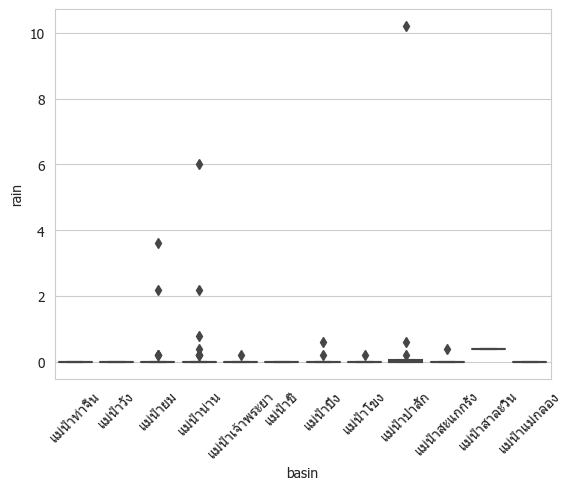

In [24]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
my_plot=sns.boxplot(x = 'basin', y = 'rain', data = df) 
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\1402250125.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rain'],bins=10, kde=True, color="g").set_title('Hourly rain', fontdict={'fontsize': 24, 'horizontalalignment': 'center'})


Text(0.5, 1.0, 'Hourly rain')

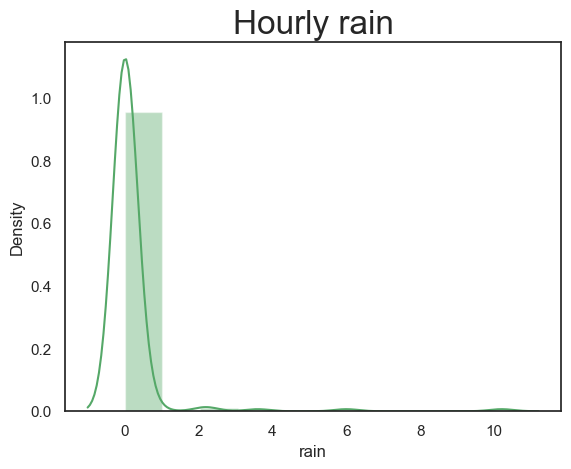

In [25]:
sns.set( style = "white" )
sns.distplot(df['rain'],bins=10, kde=True, color="g").set_title('Hourly rain', fontdict={'fontsize': 24, 'horizontalalignment': 'center'}) 

## ส่งข้อมูลฝนรายชั่วโมงออกเป็น csv

In [26]:
#สงออก
df.to_csv('../2results/0rain_haii_hour_test/' + '/rain_pl_hourly_test.csv', encoding="TIS-620")

### อ่านฝน csv เข้ามาเพื่อพลอตแผนที่

In [27]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

<AxesSubplot: >

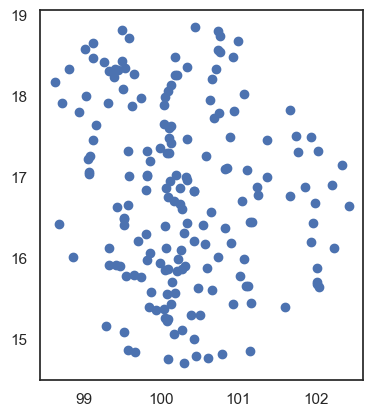

In [28]:
df = pd.read_csv('../2results/0rain_haii_hour_test/' + '/rain_pl_hourly_test.csv', encoding="TIS-620")
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry, crs= 4326)
gdf.plot()

In [29]:
basin = gpd.read_file('../1data/1shape_gis/1basin_th/MainBasin_ONWR_Law_WGS84.shp', encoding="TIS-620")
basin.head()

,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM,geometry
0,01,สาละวิน,Salawin,19101.550019,"MULTIPOLYGON (((427015.307 2117880.732, 427015..."
1,02,โขงเหนือ,North Khong,17432.583752,"POLYGON ((492274.691 2185816.923, 492298.497 2..."
2,03,โขงตะวันออกเฉียงเหนือ,Northeast Khong,47165.078898,"MULTIPOLYGON (((1202723.451 1695889.957, 12026..."
3,04,ชี,Chi,49269.589431,"POLYGON ((1066959.970 1808982.947, 1066925.717..."
4,05,มูล,Mun,70947.717673,"POLYGON ((1199462.673 1703888.438, 1199449.364..."


<AxesSubplot: >

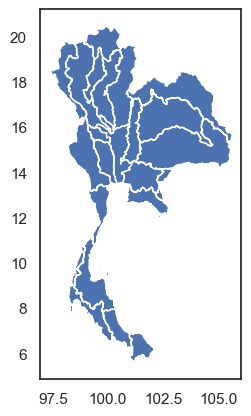

In [30]:
basin=basin.to_crs(4326)
basin.plot()

<AxesSubplot: >

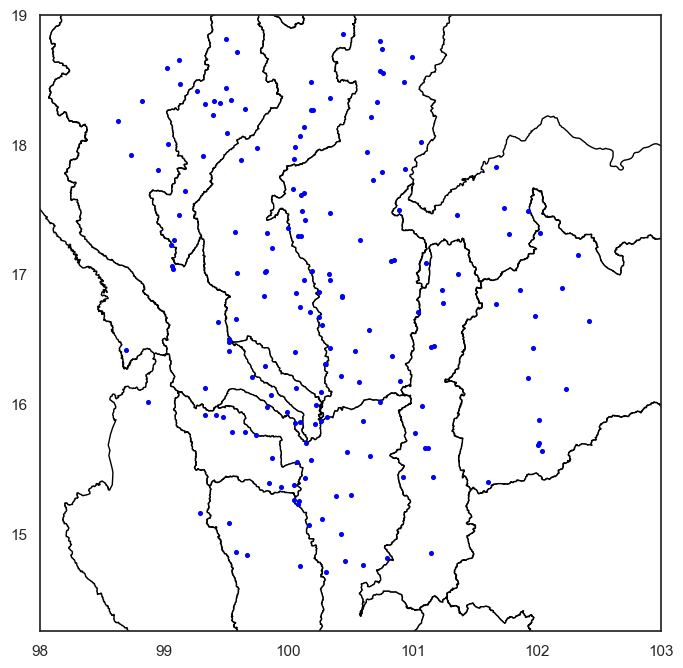

In [31]:
ax = basin.plot(edgecolor='black', color='white', figsize=(12, 8))

xlim = ([98.00, 103.0])
ylim = ([14.25, 19.0])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf.plot(ax=ax, color='blue',marker="o", markersize=7)

## ประมาณค่าฝนสถานีให้เป็นราสเตอร์ด้วย IDW
โค้ดจาก https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Spatial-Interpolation/Inverse-Distance-Weighting/IDW-interpolation-of-weather-data/index.html

In [32]:
# แปลงพิกัดเป็น utm ก่อนประมาณค่า
basin=basin.to_crs(32647)
gauge=gdf.to_crs(32647)

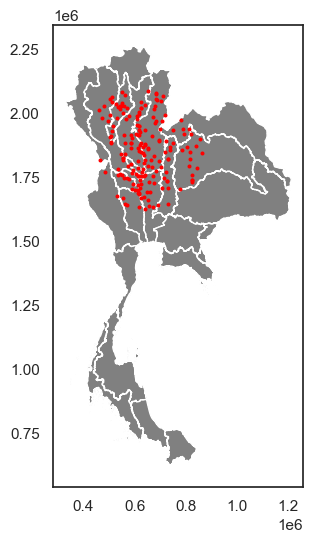

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
basin.plot(ax=ax, color="grey")
gauge.plot(
    ax=ax,
    markersize=3.5,
    color="red",
)

plt.show()

In [34]:
xmin, ymin, xmax, ymax = gauge.total_bounds
# # size of the grid to interpolate
nx, ny = 50, 50

# generate two arrays of evenly space data between ends of previous arrays
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)

# generate grid
xi, yi = np.meshgrid(xi, yi)

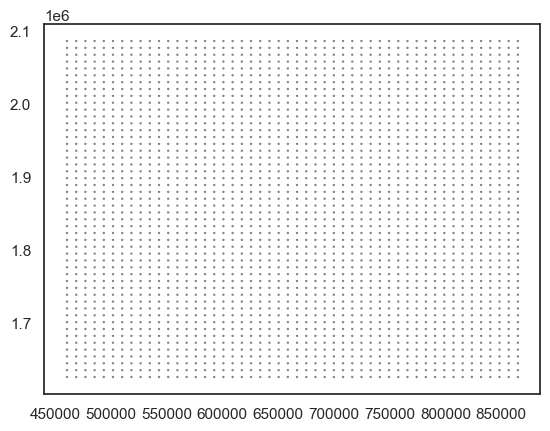

In [35]:
plt.scatter(xi, yi, marker="o", color="none", edgecolor="grey", s=0.5)

In [36]:
def distance_matrix(x0, y0, x1, y1):
    """
    Calculate distance matrix.
    Note: from <http://stackoverflow.com/questions/1871536>
    """

    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:, 0], interp[:, 0])
    d1 = np.subtract.outer(obs[:, 1], interp[:, 1])

    # calculate hypotenuse
    return np.hypot(d0, d1)


def simple_idw(x, y, z, xi, yi, beta=2):
    """
    Simple inverse distance weighted (IDW) interpolation
    x`, `y`,`z` = known data arrays containing coordinates and data used for interpolation
    `xi`, `yi` =  two arrays of grid coordinates
    `beta` = determines the degree to which the nearer point(s) are preferred over more distant points.
            Typically 1 or 2 (inverse or inverse squared relationship)
    """

    dist = distance_matrix(x, y, xi, yi)

    # In IDW, weights are 1 / distance
    # weights = 1.0/(dist+1e-12)**power
    weights = dist ** (-beta)

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

In [37]:
# # size of the grid to interpolate
nx, ny = 50, 50

# generate two arrays of evenly space data between ends of previous arrays
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)

# generate grid
xi, yi = np.meshgrid(xi, yi)

# colapse grid into 1D
xi, yi = xi.flatten(), yi.flatten()

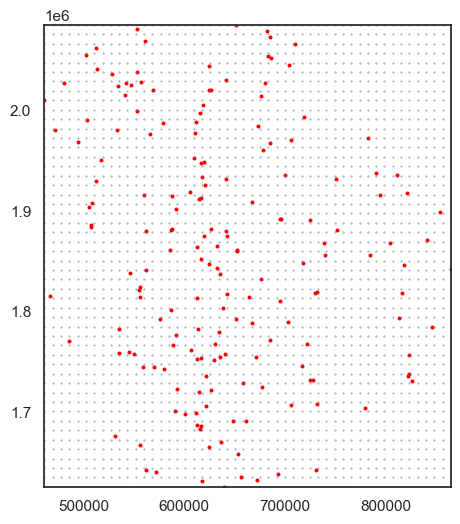

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

xlim = ([xmin, xmax])
ylim = ([ymin, ymax])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

basin.plot(ax=ax, color="none")
gauge.plot(
    ax=ax,
    markersize=3.5,
    color="red",
)
ax.scatter(xi, yi, s=0.1)

plt.show()

In [39]:
x = gauge.geometry.x
y = gauge.geometry.y
z = gauge.rain

In [40]:
# Calculate IDW
rain_grid = simple_idw(x, y, z, xi, yi, beta=2)
rain_grid = rain_grid.reshape((nx, ny))

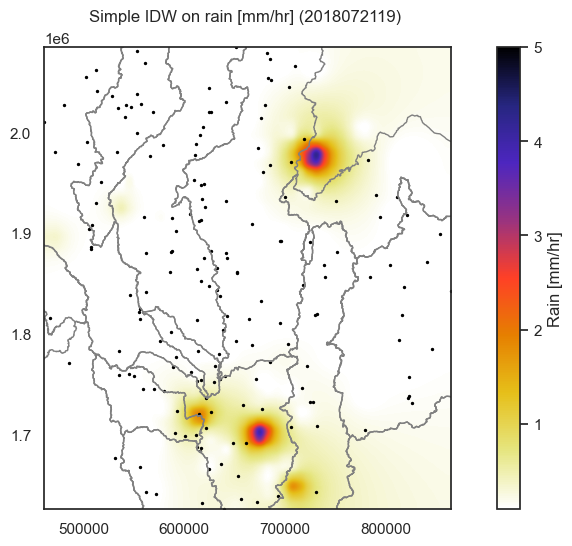

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

xlim = ([xmin, xmax])
ylim = ([ymin, ymax])

ax.set_xlim(xlim)
ax.set_ylim(ylim)


grid = ax.imshow(
    rain_grid,
    extent=(xmin, xmax, ymin, ymax),
    cmap="CMRmap_r",
    interpolation="gaussian",
    vmin=0.1,
    vmax=5,
)
# plt.scatter(x,y,c=z, cmap='rainbow', edgecolors='black')
ax.scatter(x, y, color="black", s=2)
plt.title("Simple IDW on rain [mm/hr] (2018072119) \n")
basin.plot(ax=ax, color="none", edgecolor='grey', linewidth=1)

fig.colorbar(grid, ax=ax, label="Rain [mm/hr]")
plt.show()

### ทดสอบ
* ดึงฝนชั่วโมงที่ต้องการนำมาสกัดค่า dbz ระวังเวลาฝนสสน.เป็นเวลาท้องถิ่น ส่วนเรดาร์ใช้เวลา UTC +7
